# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №2 - Алгоритмы кластеризации


###### <hr\>
**Общая информация**

**Срок сдачи:** 23 октября 2017, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 23 октября, -4 балла после 06:00 30 октября, -6 баллов после 06:00 6 ноября

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush Необходимо в slack создать таск в приватный чат:
/todo Фамилия Имя ссылка на гитхаб @alkhamush
Пример:
/todo Ксения Стройкова https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb @alkhamush

Используйте данный Ipython Notebook при оформлении домашнего задания.
<hr\>

###### Задание 1 (4 балла)
Реализовать алгоритм кластеризации, который относится к вашему варианту. Проверить работоспособность алгоритма на "Iris". Сравните свой алгоритм кластеризации с алгоритмом из scikit-learn по времени выполнения, использую timeit. Ваша реализация не должна работать сильно дольше, а в идеале должна быть даже немного быстрее.

###### Задание 2 (2 балла)
Выбрать, имплементировать и использовать критерий качества

###### Задание 3 (3балла)
Применить алгоритм кластеризации к данным по странам.   
Подход следующий: фиксируем год, для каждой страны берём индикаторы по зафиксированному году, кластеризуем по индикаторам.   
Разбиение должно быть объяснимым, в противном случае, скорее всего нужно лучше настроить параметры кластеризации.   
Данные нужно скачать тут https://data.worldbank.org/data-catalog/world-development-indicators.   
Также необходимо показать, какие страны попали в общий кластер.
изуализировать результат с помощью T-SNE. Внимание! На полном объеме данных данный алгоритм может работать существенное время.

###### Задание 4 (1 балл)
Опишите в выводе почему и какие страны попали в общий кластер.

Основная задача этого задания - реализация одного из алгоритмов кластеризации. Кроме того, мы научимся подбирать параметры алгоритма, визуализируем результат кластеризации и попытаемся проанализировать природу полученных кластеров.

In [1]:

import pandas as pd
import pylab as pl
import numpy as np
import scipy.spatial as ss
import sklearn.cluster as sc
import sklearn.manifold as sm
import sklearn.datasets as ds
import sklearn.metrics as smt
import sklearn.mixture as skmi

import matplotlib.pyplot as plt
import mpl_toolkits.basemap as bm

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

# Plotting config
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Реализация алгоритма

Алгоритм кластеризации, который необходимо реализовать, выбирается на основании Вашего порядкового номера в списке группы.

1. Авилова Екатерина
2. Адаменко Павел
3. Акиньщиков Алексей
4. Афанасьева Анастасия
5. Балес Александр
6. Беляев Владимир
7. Беспалова Анастасия
8. Богомолов Эмиль
9. Боднарюк Василий
10. Бучкин Александр
11. Валинуров Денис
12. Волков Глеб
13. Голенков Кирилл
14. Горбушин Михаил
15. Димов Илья
16. Докшина Елизавета
17. Дорожинский Владислав
18. Жирнов Михаил
19. Жолковский Евгений
20. Зайдель Петр
21. Зимнюков Максим
22. Иванов Илья
23. Кашипов Артем
24. Комов Евгений
25. Кошман Дима
26. Кузнецова Екатерина
27. Кулагин Алексей
28. Лавреновъ Виталiй
29. Лебедь Федор
30. Лешков Михаил
31. Лозинский Иван
32. Лоскутов Антон
33. Лютов Владимир
34. Мажаров Иван
35. Манкевич Павел
36. Муравьев Никита
37. Находнов Максим
38. Оплачко Николай
39. Павлов Евгений
40. Петряйкин Федор
41. Рахматуллин Фарид
42. Секретарев Тихон
43. Сенюшкин Дмитрий
44. Серов Николай
45. Смирнов Александр
46. Соловьев Павел
47. Сомов Иван
48. Спиркин Роман
49. Терёшина Мария
50. Торбунова Екатерина
51. Тюгаев Антон
52. Фельдман Борис
53. Филин Максим
54. Фролов Михаил
55. Хохлов Олег
56. Черемнов Андрей
57. Шевцов Антон
58. Шурыгин Александр

In [8]:
N = 48 # put your index here

In [9]:
algorithms = [
    u"Gaussian Mixture Model с использованием maximum a-posteriori для выбора кластера (параметр - k)",
    u"Hierarchical clustering с поддержкой single-linkage, complete-linkage, average-linkage (параметры - k, linkage)",
    u"DBSCAN. (параметры - epsilon, min_pts)"
]

my_algorithm = algorithms[N % len(algorithms)]
print u"Реализуем алгоритм кластеризации '%s'" % my_algorithm

Реализуем алгоритм кластеризации 'Gaussian Mixture Model с использованием maximum a-posteriori для выбора кластера (параметр - k)'


Алгоритм кластеризации должен удовлетворять следующему интерфейсу. Конструктор принимает набор параметров, необходимых для работы алгоритма кластеризации. Метод `fit` подсчитывает параметры модели и возвращает `self`. Метод `predict` возвращает вектор с индексами кластеров для поданных в него объектов `x`

In [2]:
## Задание 1
from sklearn.base import BaseEstimator, ClusterMixin
from scipy.stats import multivariate_normal
from itertools import count
import time
class Clustering(BaseEstimator, ClusterMixin):
    """
    Implement clustering algorithm according 
    """
    
    def __init__(self, k, random_state=None, eps=1e-2, max_steps = 100):
        """
        Please add necessary algoritm parameters to class constructor.
        """
        self.k = k
        self.random_state = random_state
        self.eps = eps
        self.max_steps =max_steps
        return
        
    def fit(self, X, y=None):
        """
        Use data matrix x to compute model parameters
        """
        
        self.x_len = len(X)
        #Инициализация начальных значений
        #k - число компонент смеси
        #math_expectation - математические ожидания
        #variance - дисперсия
        #pi - вероятности смесей
        #g - вспомогательный вектор скрытых переменных
        
        #Изначально мат ожидание выбираем как делали в k-means++, первую случайно,потом считаем растояния и выбираем согласно случайному выбору
        #Матрица ковариции - единичная матрица
        #Веса у смесей всех одинаковые
        
        np.random.seed(self.random_state)
        self.math_expectation = [X[np.random.randint(0, X.shape[0])]]
        for i in range(1, self.k):
            cumsum = np.cumsum(ss.distance.cdist(X, self.math_expectation, metric='sqeuclidean').min(axis=1))
            index = (cumsum >= np.random.random() * cumsum[-1]).tolist().index(True)
            self.math_expectation.append(X[index])
        self.math_expectation = np.array(self.math_expectation)
        self.variance = np.array([np.eye(len(X[0])) for i in range(self.k)])
        self.pi = np.ones(self.k) / self.k
        self.g= np.zeros((self.k, self.x_len))
        
        likilihood_previous = 2
        for step in range(self.max_steps):
            #E шаг пересчитываем ожидаемое значение вектора скрытых переменных(g)
         
            for j in range(self.k):
                self.g[j, :] = self.pi[j] * multivariate_normal.pdf(X, allow_singular=True, mean = self.math_expectation[j], cov = self.variance[j])
            g_sum = np.sum(self.g, axis = 0)
            self.g = self.g / g_sum

            likilihood = np.sum(np.array(g_sum))
            if (abs(likilihood_previous- likilihood) < self.eps):
                return self
            likilihood_previous = likilihood
      
            #M шаг решает задачу максимизации правдоподобия и находится следующее приближение вектора параметров 
            N = np.sum(self.g, axis = 1)
            self.math_expectation = np.dot(self.g[:], X) / N[:, None]
            self.pi = N[:,None] / self.x_len
            for i in range(self.k):
                for j in range(len(X)):
                    self.variance[i]+= self.g[i,j] * np.outer(X[j] - self.math_expectation[i], X[j] - self.math_expectation[i])
                self.variance[i] = self.variance[i] / N[i]
            
        return self
    
    
    def predict(self, X):
        """
        Using computed model parameters predict cluster
        for all objects from x
        """
        y = np.array([np.argmax([self.pi[i] * multivariate_normal.pdf(X[j], allow_singular=True, mean = self.math_expectation[i], cov = self.variance[i]) for i in range(self.k)])
                     for j in range(len(X))] )
        return y
     
       
    
    def fit_predict(self, X, y=None):
        self.fit(X, y)
        return self.predict(X)

Сначала проверим реализованный алгоритм кластеризации на классическом наборе данных [Iris](http://www.wikiwand.com/en/Iris_flower_data_set). Загрузим данные (они включены в библиотеку sklearn) и посмотрим на то, как они выглядят в двух проекциях (для простоты используем 2 класса из 3).

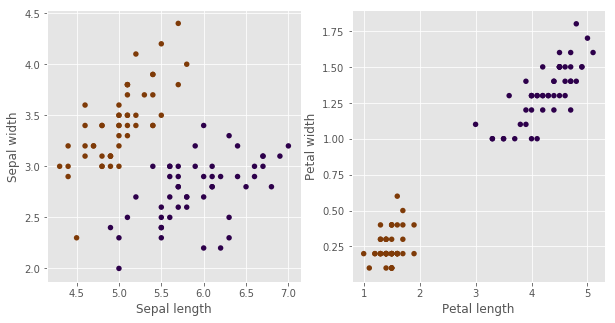

In [3]:
iris = ds.load_iris()
x_iris = iris.data[:100]
y_iris = iris.target[:100]

pl.figure(figsize=(10, 5))

pl.subplot(1, 2, 1)
pl.scatter(x_iris[:, 0], x_iris[:, 1], c=y_iris, cmap=pl.cm.PuOr, lw=0, s=30)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

pl.subplot(1, 2, 2)
pl.scatter(x_iris[:, 2], x_iris[:, 3], c=y_iris, cmap=pl.cm.PuOr, lw=0, s=30)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
pl.show()

Видно, что классы разделяются, поэтому можно надеяться, что наш алгоритм "найдет" кластеры, соответствующие исходным классам. Результат работы реализованного алгоритма кластеризации предлагается сравнить с эталонной кластеризацией. Для этого предлагается изучить метрику ([adjusted rand score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html)). В случае если значение этой метрики отличается от 1, предлагается поработать над улучшением реализации своего алгоритма.

In [4]:
%%time
pred_iris = Clustering(k=2,random_state=100).fit_predict(x_iris)
print "Adjusted Rand index for iris is: %.2f" % smt.adjusted_rand_score(y_iris, pred_iris) 

Adjusted Rand index for iris is: 1.00
CPU times: user 44 ms, sys: 4 ms, total: 48 ms
Wall time: 293 ms


In [5]:
%%time
model = skmi.GaussianMixture(n_components=2)
model.fit(x_iris)
pred_iris = model.predict(x_iris)
print "Adjusted Rand index for iris is: %.2f" % smt.adjusted_rand_score(y_iris, pred_iris) 

Adjusted Rand index for iris is: 1.00
CPU times: user 8 ms, sys: 0 ns, total: 8 ms
Wall time: 122 ms


Выбрать и реализовать критерий качества, на основании которого будут подбираться параметры модели. Варианты критериев:
- Инерция (сумма квадратов расстояний от каждой из точек до ближайшего к этой точке центроида)
- Средний диаметр (максимальное расстояние между точками в кластере) или радиус (расстояние от центроида до самой дальней от него точки в кластере)
- Sihouette

**Критерий качества необходимо выбрать таким образом, чтобы он подходил для реализованного алгоритма**

In [6]:
## Задание 2
def quality(x, y): # Инерция 
    """
    Implement quality criterion of your choice
    """
    set(y)
    clusters = [[] for i in set(y)]
    for i in range(len(x)):
        clusters[y[i]].append(x[i])
    Sum = 0
    for i in range(len(clusters)):
        Middle = np.mean(clusters[i], axis = 0) 
        Sum += np.sum([np.sum((Middle-ob) ** 2) for ob in clusters[i]])
    return Sum

Применим критерий для выбора параметров алгоритма. Предлагается изменить следующий код таким образом, чтобы кластеризация вызывалась с верным набором параметров. На графике можно будет увидеть зависимость критерия от параметров алгоритма. Необходимо выбрать оптимальные значения этих параметров.

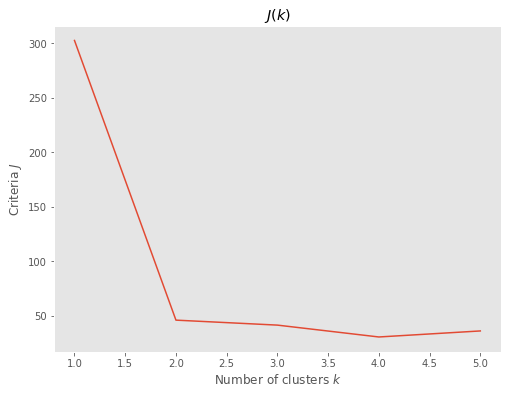

In [7]:
ks = range(1, 6)
criteria = np.zeros(len(ks))

for i, k in enumerate(ks):
    y = Clustering(k,random_state = 100).fit_predict(x_iris)
    criteria[i] = quality(x_iris, y)
pl.figure(figsize=(8, 6))
pl.plot(ks, criteria)
pl.title("$J(k)$")
pl.ylabel("Criteria $J$")
pl.xlabel("Number of clusters $k$")
pl.grid()
pl.show()

Как видим 2 кластера оптимально,потом улучшения не значительны(принцип локтя)

## Задание 3

Применить алгоритм кластеризации к данным по странам.   
Подход следующий: фиксируем год, для каждой страны берём индикаторы по зафиксированному году, кластеризуем по индикаторам.   
Разбиение должно быть объяснимым, в противном случае, скорее всего нужно лучше настроить параметры кластеризации.   
Данные нужно скачать тут https://data.worldbank.org/data-catalog/world-development-indicators.   
Также необходимо показать, какие страны попали в общий кластер.
изуализировать результат с помощью T-SNE. Внимание! На полном объеме данных данный алгоритм может работать существенное время.

In [8]:
df = pd.read_csv('WDIData.csv')
data = df[['Country Name','Indicator Name','1996']]
data = data.dropna(axis= 0)
data.head()

,Country Name,Indicator Name,1996
3,Arab World,Access to electricity (% of population),76.768569
4,Arab World,"Access to electricity, rural (% of rural popul...",64.701319
24,Arab World,"Adjusted net enrollment rate, primary (% of pr...",73.903511
25,Arab World,"Adjusted net enrollment rate, primary, female ...",68.780800
26,Arab World,"Adjusted net enrollment rate, primary, male (%...",78.817490


In [9]:
dframe = data['1996'].groupby([data['Country Name'],data['Indicator Name']]).sum().unstack()
for frame in dframe.columns: 
    dframe[frame].fillna(dframe[frame].mean(), inplace = True)
dframe.head()

Indicator Name,ARI treatment (% of children under 5 taken to a health provider),Access to electricity (% of population),"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)","Adjusted net enrollment rate, primary (% of primary school age children)","Adjusted net enrollment rate, primary, female (% of primary school age children)","Adjusted net enrollment rate, primary, male (% of primary school age children)",Adjusted net national income (annual % growth),Adjusted net national income (constant 2010 US$),Adjusted net national income (current US$),...,"Vulnerable employment, female (% of female employment)","Vulnerable employment, male (% of male employment)","Vulnerable employment, total (% of total employment)","Wage and salaried workers, female (% of female employment)","Wage and salaried workers, male (% of male employment)","Wage and salaried workers, total (% of total employment)",Wanted fertility rate (births per woman),Wholesale price index (2010 = 100),Women who were first married by age 18 (% of women ages 20-24),Women's share of population ages 15+ living with HIV (%)
Country Name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,51.536364,72.327822,66.581366,89.079443,80.38372,77.563933,83.096288,5.030697,1.781758e+12,1.006656e+12,...,25.570814,25.470186,25.505091,73.115211,70.059878,71.250558,3.791667,56.132065,37.89,25.826599
Albania,51.536364,100.000000,100.000000,100.000000,80.38372,77.563933,83.096288,5.030697,5.927707e+09,3.167601e+09,...,25.570814,25.470186,25.505091,73.115211,70.059878,71.250558,3.791667,56.132065,37.89,29.126662
Algeria,51.536364,95.352905,94.269524,89.079443,80.38372,77.563933,83.096288,4.223385,6.031018e+10,3.767343e+10,...,25.570814,25.470186,25.505091,73.115211,70.059878,71.250558,3.791667,56.132065,37.89,31.564018
American Samoa,51.536364,72.327822,66.581366,89.079443,80.38372,77.563933,83.096288,5.030697,1.781758e+12,1.006656e+12,...,25.570814,25.470186,25.505091,73.115211,70.059878,71.250558,3.791667,56.132065,37.89,39.109767
Andorra,51.536364,100.000000,100.000000,100.000000,80.38372,77.563933,83.096288,5.030697,1.781758e+12,1.006656e+12,...,25.570814,25.470186,25.505091,73.115211,70.059878,71.250558,3.791667,56.132065,37.89,39.109767


In [59]:
Country_name = np.array(list(dframe.axes[0]))
Array = np.array(dframe)
Array

array([[  51.53636364,   72.32782248,   66.58136586, ...,   56.13206502,
          37.89      ,   25.82659878],
       [  51.53636364,  100.        ,  100.        , ...,   56.13206502,
          37.89      ,   29.12666237],
       [  51.53636364,   95.35290527,   94.26952362, ...,   56.13206502,
          37.89      ,   31.56401763],
       ..., 
       [  51.53636364,   44.69743347,   31.29094124, ...,   56.13206502,
          37.89      ,   26.94705042],
       [  70.7       ,   17.3       ,    1.5       , ...,   56.13206502,
          44.2       ,   54.31090258],
       [  51.53636364,   31.92196655,    5.64891052, ...,   56.13206502,
          37.89      ,   54.58794557]])

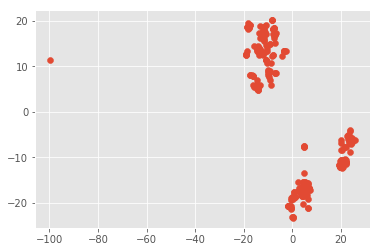

In [61]:
from sklearn.manifold import TSNE
Array_embedded = TSNE(n_components= 2).fit_transform(Array)
plt.scatter(Array_embedded[:, 0], Array_embedded[:, 1])

In [73]:
model = Clustering(k = 4)
model.fit(Array_embedded)
y_Array = model.predict(Array_embedded)

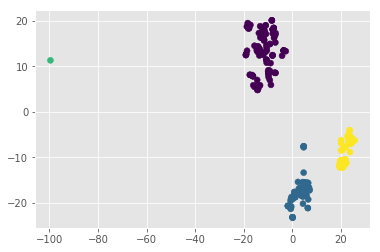

In [74]:
plt.scatter(Array_embedded[:, 0], Array_embedded[:, 1], c = y_Array)

In [75]:
Country_clusters = [[] for i in range(len(set(y_Array)))]
for i in range(len(y_Array)):
    Country_clusters[y_Array[i]].append(Country_name[i])

In [76]:
Country_clusters

[['Albania',
  'Algeria',
  'Antigua and Barbuda',
  'Argentina',
  'Armenia',
  'Australia',
  'Austria',
  'Azerbaijan',
  'Bahamas, The',
  'Bangladesh',
  'Barbados',
  'Belarus',
  'Belgium',
  'Belize',
  'Benin',
  'Bolivia',
  'Botswana',
  'Brazil',
  'Brunei Darussalam',
  'Bulgaria',
  'Burkina Faso',
  'Cambodia',
  'Cameroon',
  'Canada',
  'Chad',
  'Comoros',
  'Congo, Dem. Rep.',
  'Congo, Rep.',
  'Costa Rica',
  'Croatia',
  'Cuba',
  'Cyprus',
  'Czech Republic',
  'Denmark',
  'Djibouti',
  'Dominican Republic',
  'Ecuador',
  'Egypt, Arab Rep.',
  'El Salvador',
  'Equatorial Guinea',
  'Eritrea',
  'Estonia',
  'Finland',
  'France',
  'Gabon',
  'Gambia, The',
  'Germany',
  'Greece',
  'Guatemala',
  'Guinea',
  'Haiti',
  'Honduras',
  'Hong Kong SAR, China',
  'Hungary',
  'Iceland',
  'India',
  'Ireland',
  'Israel',
  'Italy',
  'Jordan',
  'Kazakhstan',
  'Kenya',
  'Kyrgyz Republic',
  'Latvia',
  'Lebanon',
  'Lesotho',
  'Lithuania',
  'Luxembourg',
  '

## Задание 4
Учитывая значения столбцов,можно сделать следующий вывод:
Индонезия отделилась в отдельный кластер,в третий. Наиболее развитые страны попали в первый кластер. Менее развитые в четвертый кластер. Еще менее попали во второй,там много стран Африки.

Поздравляем, Вы завершили домашние задания по модулю "Алгоритмы кластеризации". Надеемся, что это было интересно.